<a href="https://colab.research.google.com/github/LeToyek/2141720085-pcvk-2023/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

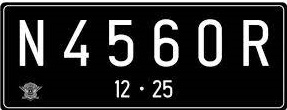

In [58]:
ori = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(ori)

In [59]:
def dilasi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if image[i, j] == 255:
                result[i-1:i+2, j] = 255
                result[i, j-1:j+2] = 255

    return result

In [60]:
def showCompImage(img1,img2,title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(f"Original Image")
  plt.imshow(img1,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 2, 2)
  plt.title(f"{title}")
  plt.imshow(img2,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

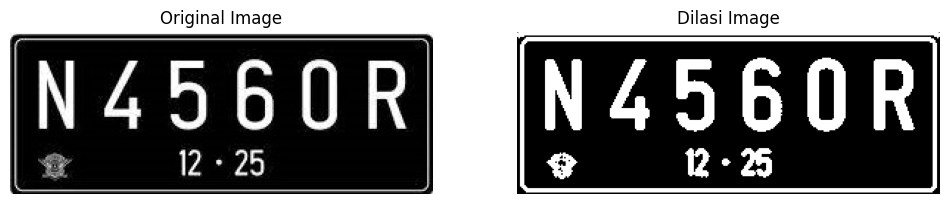

In [61]:
plat = "/content/drive/MyDrive/PCVK/plat_nomer.jpg"
# Baca citra
image = cv2.imread(plat, cv2.IMREAD_GRAYSCALE)

# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Lakukan dilasi
dilated_image = dilasi(image)

# Tampilkan hasil dilasi
showCompImage(ori,dilated_image,"Dilasi Image")

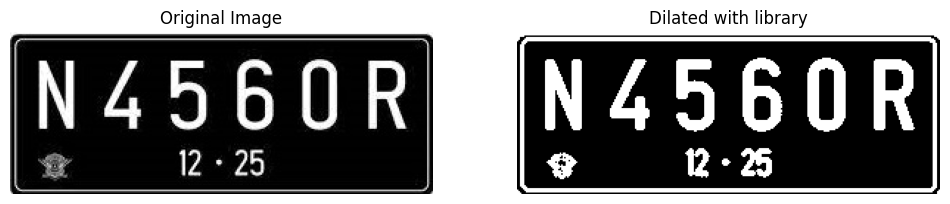

In [62]:
# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Buat SED (Structuring Element) berbentuk cross 3x3
cross_SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Lakukan operasi dilasi
dilated_image = cv2.dilate(image, cross_SED)

showCompImage(ori,dilated_image,"Dilated with library")

In [65]:
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    # Ukuran SE square 5x5
    se_size = 5

    for i in range(se_size // 2, height - se_size // 2):
        for j in range(se_size // 2, width - se_size // 2):
            if np.all(image[i - se_size // 2:i + se_size // 2 + 1, j - se_size // 2:j + se_size // 2 + 1] == 255):
                result[i, j] = 255

    return result

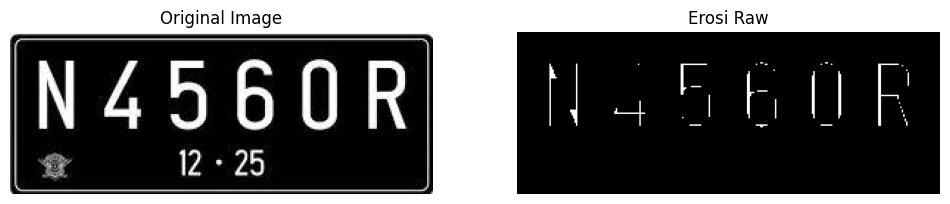

In [66]:
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Lakukan erosi
eroted_image = erosi(image)

showCompImage(ori,eroted_image,"Erosi Raw")

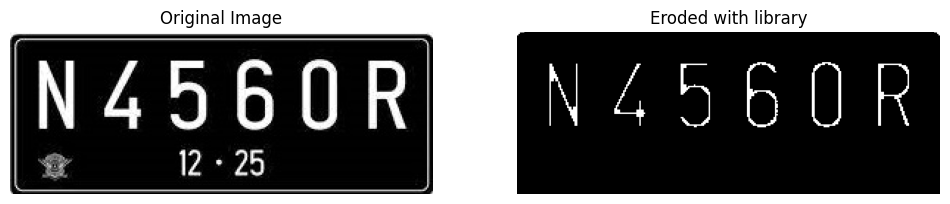

In [67]:
cross_SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Lakukan operasi erosi
dilated_image = cv2.erode(image, cross_SED)

showCompImage(ori,dilated_image,"Eroded with library")

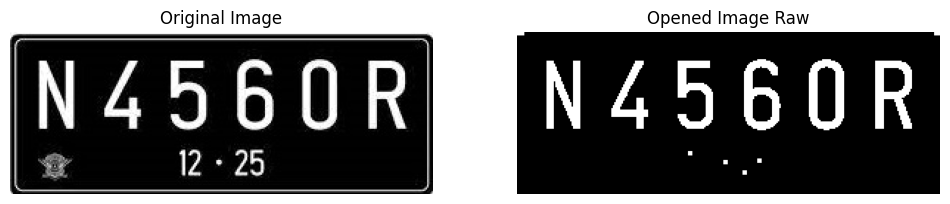

In [68]:
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if np.all(image[i-1:i+2, j-1:j+2] == 255):
                result[i, j] = 255

    return result

def dilasi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if image[i, j] == 255:
                result[i-1:i+2, j-1:j+2] = 255

    return result


# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Lakukan erosi
eroded_image = erosi(image)

# Lakukan dilasi pada hasil erosi
opened_image = dilasi(eroded_image)

showCompImage(ori,opened_image,"Opened Image Raw")


In [69]:
def compare3(img1,img2,img3,title3):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.title(f"Original Image")
  plt.imshow(img1,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 3, 2)
  plt.title(f"Binary Image")
  plt.imshow(img2,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 3, 3)
  plt.title(f"{title3}")
  plt.imshow(img3,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

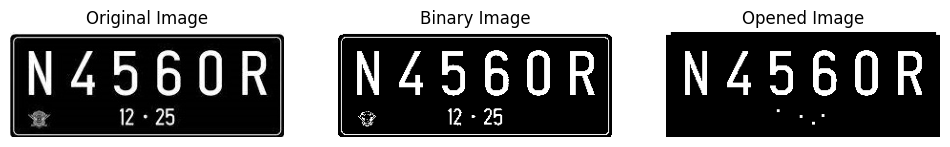

In [70]:
compare3(ori,image,opened_image,"Opened Image")

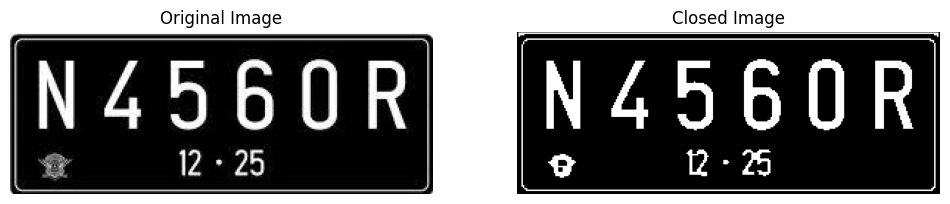

In [71]:
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

dilated_image = dilasi(image)

# Lakukan dilasi pada hasil erosi
closed_image = erosi(dilated_image)

showCompImage(ori,closed_image,"Closed Image")
